# Analog to Digital Conversion of  Voice

## By Alejandro Gómez Orjuela and Melanie Giraldo C.


## Introduction

#### Analog-to-digital conversion (ADC) is a crucial technique in digital signal processing that transforms continuous analog signals, like a human voice, into a digital format suitable for computer processing. This guide walks students through the complete ADC process, from recording a voice sample to analyzing its frequency characteristics. By the end of the project, students will gain practical experience with essential digital signal processing methods.

## Objective

#### This project focuses on practicing the analog-to-digital conversion process using a voice sample. Students will record a brief voice clip, remove silent intervals, and use sampling, quantization, and coding techniques to digitize the signal. Furthermore, students will apply Fourier transformation to examine the signal in the frequency domain, identify the typical frequency of the voice, and determine its frequency range.ange.

## 1.Import libraries

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from IPython.display import Audio, display

## 2.Import audio file

Audio duration: 30.40 seconds
Sample Frequency: 48000 Hz


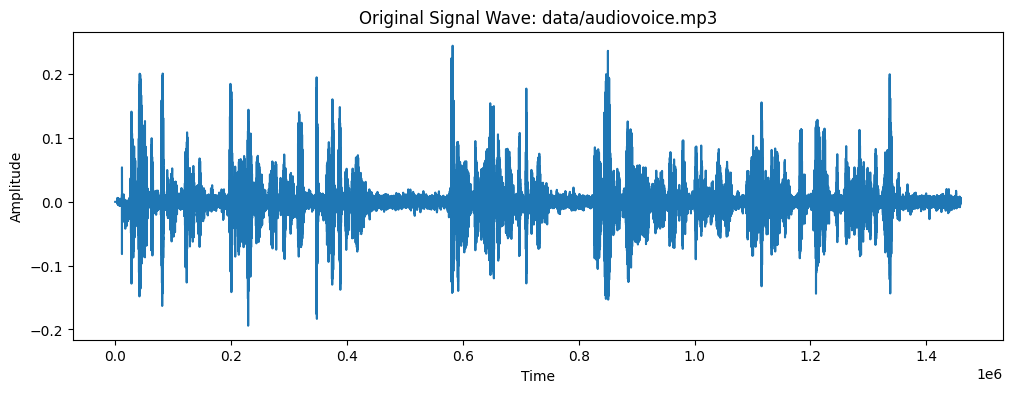

Audio duration: 21.36 seconds
Sample Frequency: 24000 Hz


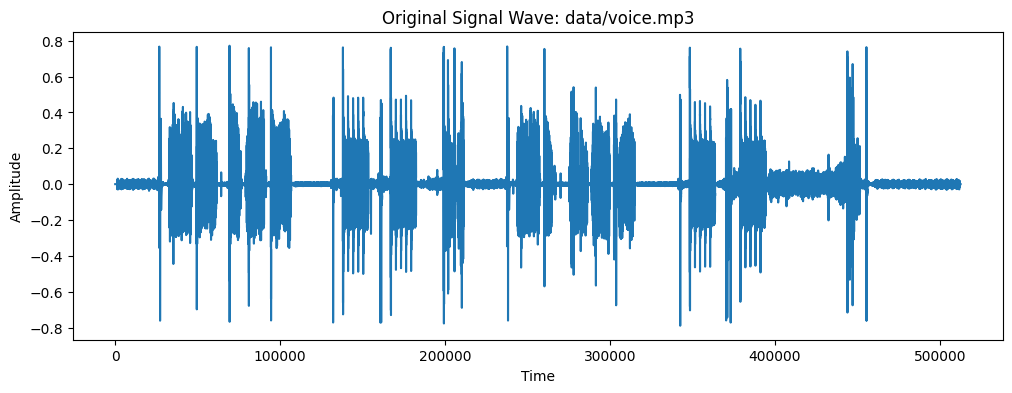

In [2]:
audio_paths = ['data/audiovoice.mp3', 'data/voice.mp3']

def load_and_display_audio(audio_path):
   
    signal, sr = librosa.load(audio_path, sr=None)
    display(Audio(audio_path, autoplay=True))
    print(f"Audio duration: {len(signal)/sr:.2f} seconds")
    print(f"Sample Frequency: {sr} Hz")

    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title(f'Original Signal Wave: {audio_path}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

    return signal, sr
signals = [load_and_display_audio(audio_path) for audio_path in audio_paths]

## 2.Filtering the Silent Intervals

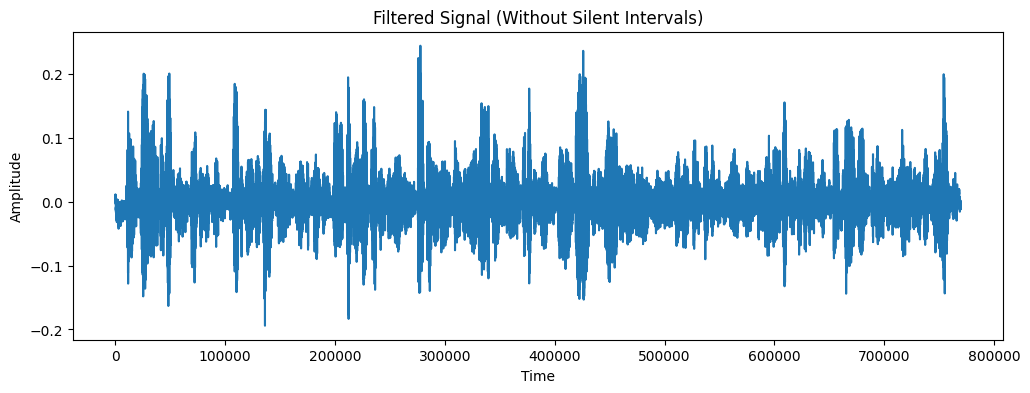

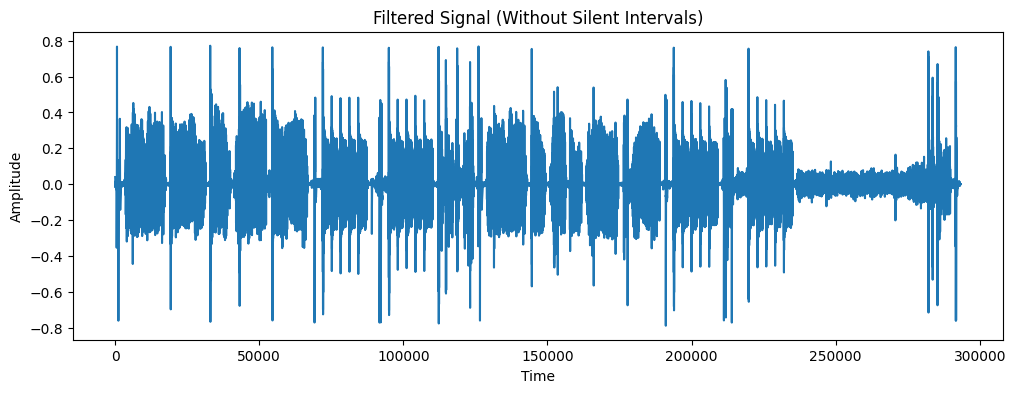

In [3]:
def filter_and_store_signal(signal):
    non_silent_intervals = librosa.effects.split(signal[0], top_db=20)
    filtered_signal = np.concatenate([signal[0][start:end] for start, end in non_silent_intervals])
    display(Audio(filtered_signal, rate=signal[1]))
    plt.figure(figsize=(12, 4))
    plt.plot(filtered_signal)
    plt.title('Filtered Signal (Without Silent Intervals)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    return filtered_signal, signal[1]

filtered_signals = [filter_and_store_signal(signal) for signal in signals]

## 3.Sampling, Quantization, and Coding

First 10 quantized values: [283 617 537 551 707 915 966 934 818 776]


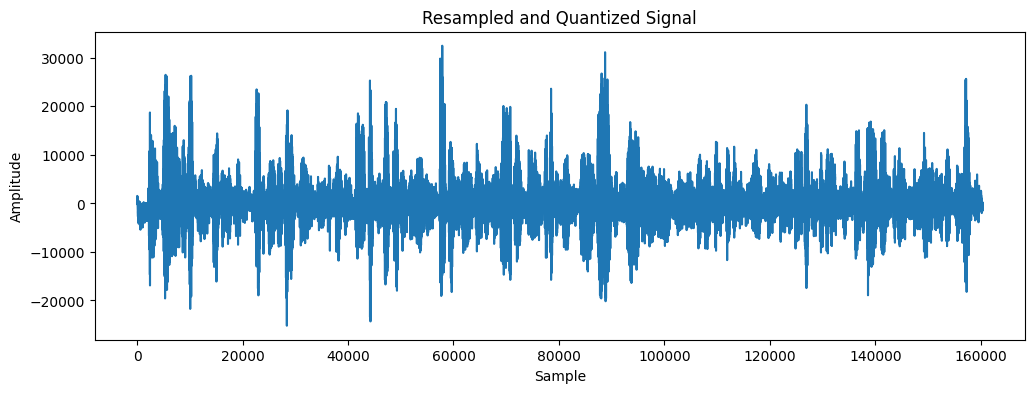

First 10 quantized values: [1106 1750 1514 1611 1491 1561 1472 1485 1398 1401]


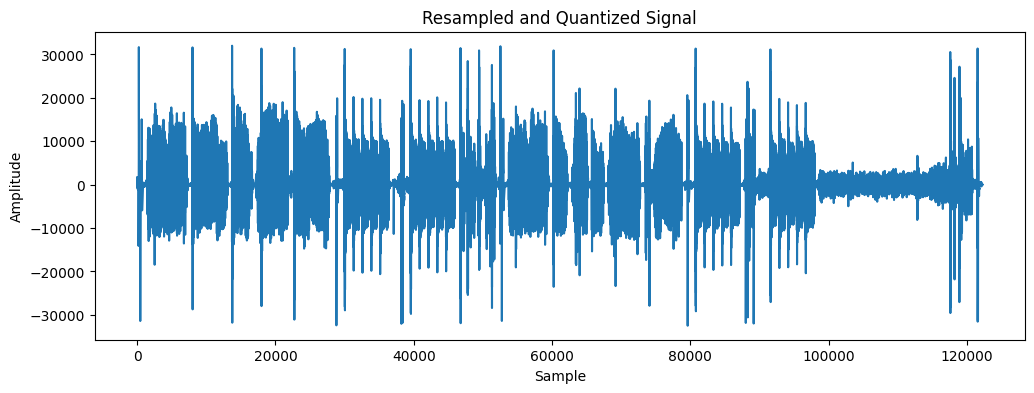

In [4]:
def resample_and_quantize(signal):
    desired_sr = 10000
    signal_resampled = librosa.resample(signal[0], orig_sr=signal[1], target_sr=desired_sr)
    quantized_signal = np.int16(signal_resampled / np.max(np.abs(signal_resampled)) * 32500)
    
    display(Audio(quantized_signal, rate=desired_sr))
    
    print("First 10 quantized values:", quantized_signal[:10])
    
    plt.figure(figsize=(12, 4))
    plt.plot(quantized_signal)
    plt.title('Resampled and Quantized Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()
    
    return quantized_signal, desired_sr

resampled_and_quantized_signals = [resample_and_quantize(signal) for signal in filtered_signals]

## 4.Fourier Transformation

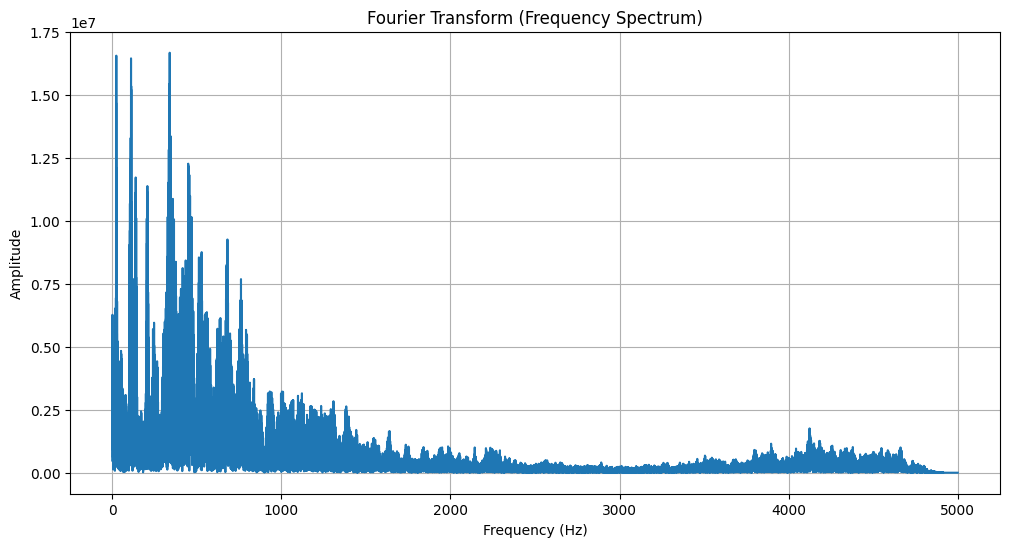

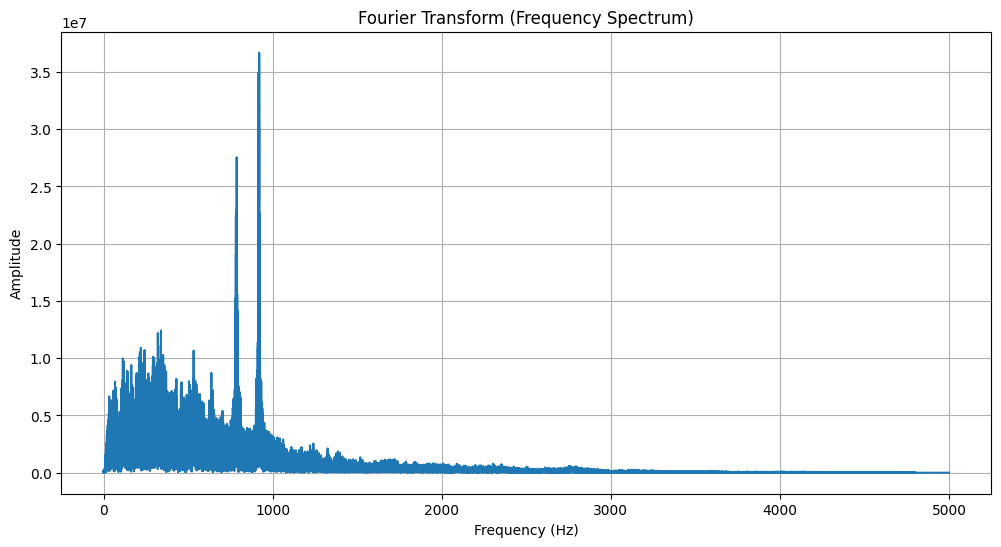

In [5]:
def plot_frequency_spectrum(quantized_signal, desired_sr):
    N = len(quantized_signal)
    yf = fft(quantized_signal)
    xf = fftfreq(N, 1 / desired_sr)
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf[:N//2], np.abs(yf[:N//2]))
    plt.title('Fourier Transform (Frequency Spectrum)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

for quantized_signal, sr in resampled_and_quantized_signals:
    plot_frequency_spectrum(quantized_signal, sr)

## 5.Visualizing the Frequency Histogram

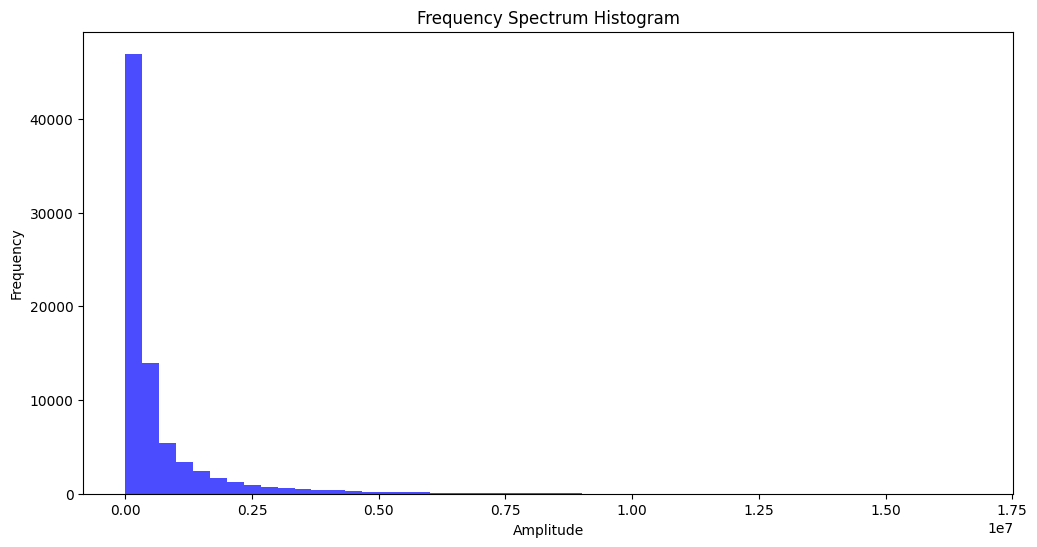

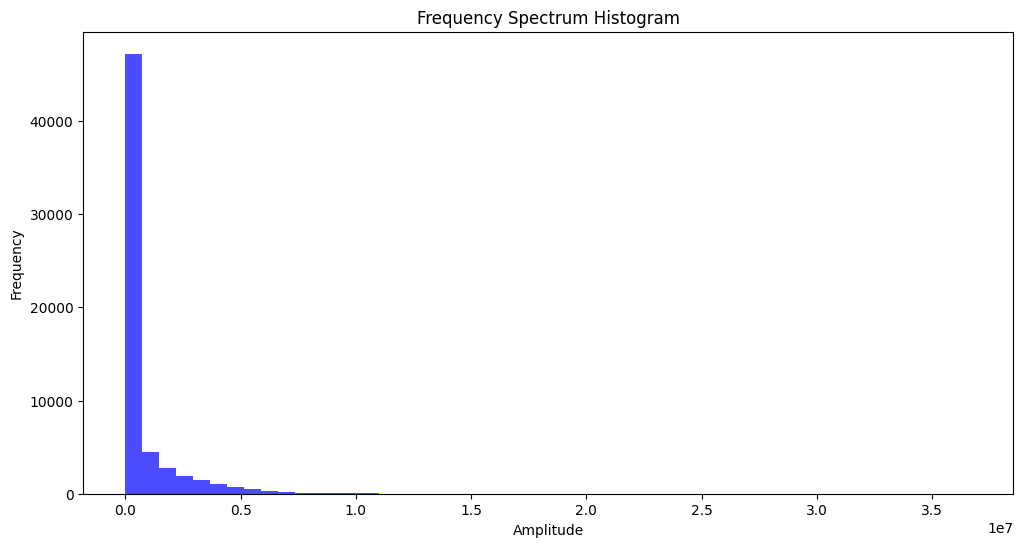

In [6]:
def plot_frequency_histogram(quantized_signal, desired_sr):
    N = len(quantized_signal)
    yf = fft(quantized_signal)
    amplitudes = np.abs(yf[:N//2])
    
    plt.figure(figsize=(12, 6))
    plt.hist(amplitudes, bins=50, color='blue', alpha=0.7)
    plt.title('Frequency Spectrum Histogram')
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')
    plt.show()

for quantized_signal, sr in resampled_and_quantized_signals:
    plot_frequency_histogram(quantized_signal, sr)


## 6.Analyzing and Reporting

In [7]:
def analyze_frequency_spectrum(quantized_signal, desired_sr):
    N = len(quantized_signal)
    yf = fft(quantized_signal)
    xf = fftfreq(N, 1 / desired_sr)
    
    dominant_freq = xf[np.argmax(np.abs(yf[:N//2]))]
    print(f"Dominant frequency: {dominant_freq:.2f} Hz")
    
    threshold = np.max(np.abs(yf[:N//2])) * 0.1
    freq_indices = np.where(np.abs(yf[:N//2]) > threshold)
    freq_range = xf[:N//2][freq_indices]
    
    if len(freq_range) > 0:
        print(f"Frequency range: {freq_range[0]:.2f} Hz to {freq_range[-1]:.2f} Hz")
    else:
        print("No frequencies above the threshold were found.")
    
    print(f"The dominant frequency of the recorded voice is {dominant_freq:.2f} Hz.")

for quantized_signal, sr in resampled_and_quantized_signals:
    analyze_frequency_spectrum(quantized_signal, sr)



Dominant frequency: 339.45 Hz
Frequency range: 0.00 Hz to 4125.00 Hz
The dominant frequency of the recorded voice is 339.45 Hz.
Dominant frequency: 920.48 Hz
Frequency range: 24.13 Hz to 951.73 Hz
The dominant frequency of the recorded voice is 920.48 Hz.


## Conclusion

#### The analysis identified the dominant frequency and determined the frequency range of the voice signal, revealing its richness and variability. Digital signal processing techniques, such as filtering and Fourier transformation, preserved the signal's key characteristics. This practical experience is valuable in telecommunications and audio fields, though challenges like noise management and precise threshold selection must be addressed for accurate analysis.